/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


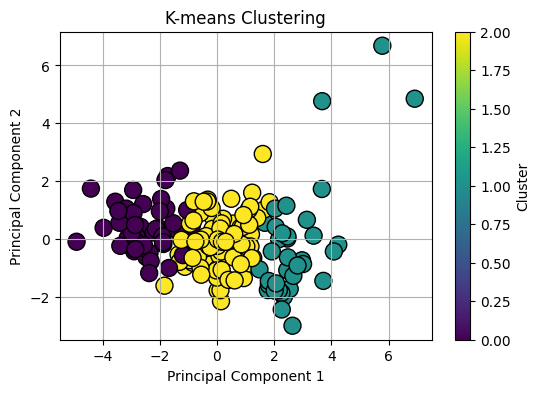

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Read the data and exclude non-numeric columns
data = pd.read_csv("/content/Country-data.csv")
numeric_data = data.drop(columns=['country'])

# Scale the numeric features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)
clusters = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(6, 4))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=150)
plt.title("K-means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

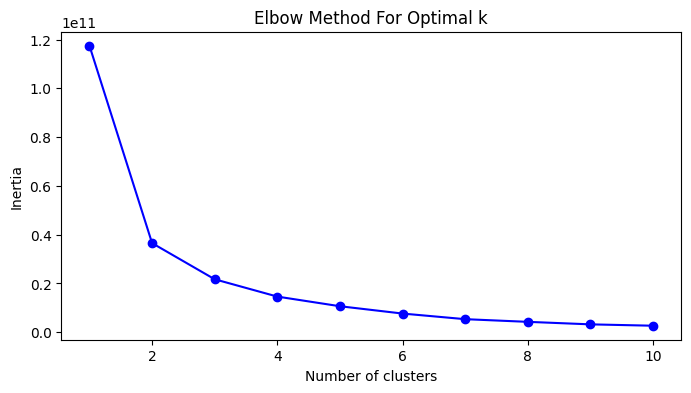

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Load the CSV file from the specified path
file_path = '/content/Country-data.csv'  # Update this with your file path
df = pd.read_csv(file_path)

# Step 2: Select only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Step 3: Prepare the data
X = numerical_df.values

# Step 4: Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)  # Check for number of clusters from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Step 5: Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


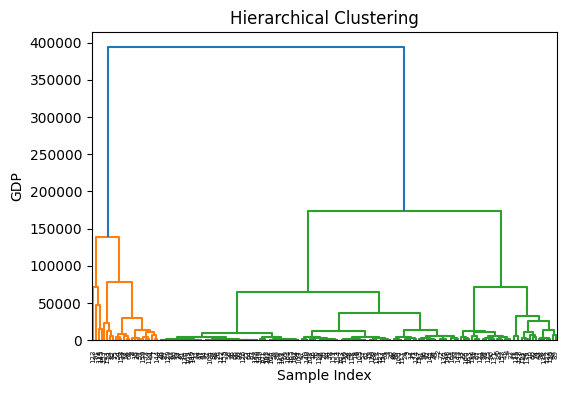

In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('/content/Country-data.csv')
numeric_data = data.drop(columns=['country'])  # Exclude non-numeric columns

# Step 2: Perform hierarchical clustering
Z = linkage(numeric_data, method='ward')

# Step 3: Plot the dendrogram
plt.figure(figsize=(6, 4))
dendrogram(Z)
plt.title('Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('GDP')  # Fixed the ylabel
plt.show()



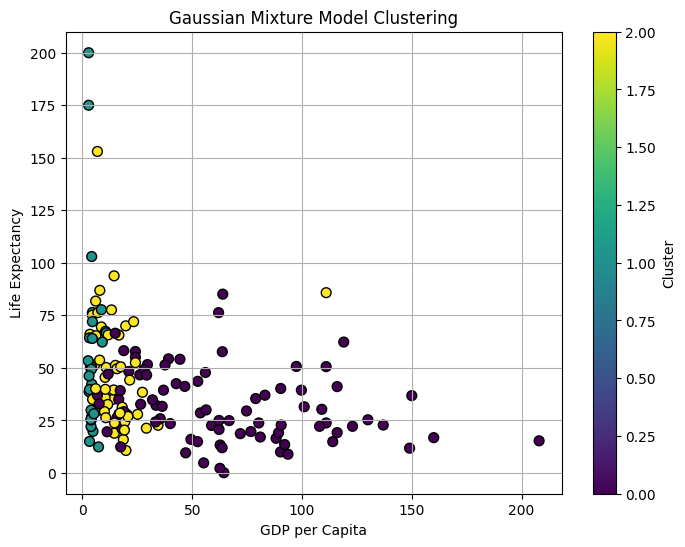

In [ ]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv("/content/Country-data.csv")

# Step 2: Preprocess the data - Select numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Step 3: Perform Gaussian Mixture Model (GMM) Clustering
gmm = GaussianMixture(n_components=3)  # You can specify the number of clusters
gmm.fit(numeric_data)
clusters = gmm.predict(numeric_data)

# Step 4: Plot the Clusters
plt.figure(figsize=(8, 6))
plt.scatter(numeric_data.iloc[:, 0], numeric_data.iloc[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("GDP per Capita")
plt.ylabel("Life Expectancy")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [ ]:
!pip install -U scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=9d7fa15556667d0dab042e1c3f25884ea7c6f2a0421df39cc774aae8f197e0a3
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


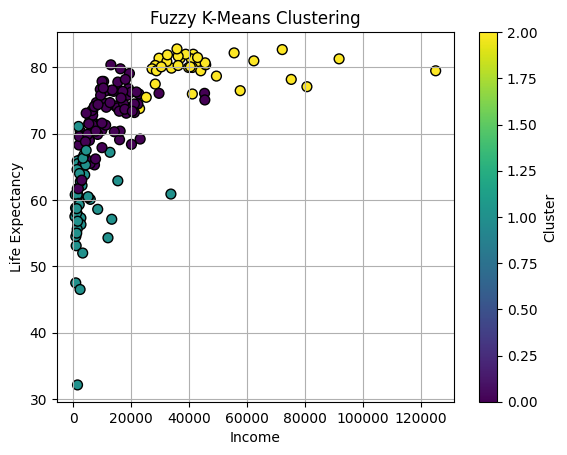

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from skfuzzy.cluster import cmeans
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv("/content/Country-data.csv")

# Step 2: Preprocess the data
numeric_data = data[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Step 3: Perform Fuzzy K-Means Clustering
cntr, u, u0, d, jm, p, fpc = cmeans(scaled_data.T, c=3, m=2, error=0.005, maxiter=1000)

# Step 4: Plot the Clusters
plt.scatter(data["income"], data["life_expec"], c=u.argmax(axis=0), cmap='viridis', edgecolor='k', s=50)
plt.title('Fuzzy K-Means Clustering')
plt.xlabel('Income')
plt.ylabel('Life Expectancy')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Step 1: Load the dataset
data = pd.read_csv('/content/Country-data.csv')

# One hot encode the data
one_hot_encoded_data = pd.get_dummies(data)

# Threshold for one hot encoding
threshold = 1000

# Select numeric columns
numeric_columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# One hot encode columns with threshold
for col in numeric_columns:
    if col in one_hot_encoded_data.columns:
        one_hot_encoded_data[col] = one_hot_encoded_data[col].apply(lambda x: 1 if x > threshold else 0)

# Apriori algorithm with min_support=0.1
frequent_itemsets = apriori(one_hot_encoded_data, min_support=0.1, use_colnames=True)

# Association rules with min_threshold=0.7
association_rules_df = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

print(association_rules_df)


  antecedents consequents  antecedent support  consequent support   support  \
0      (gdpp)    (income)            0.808383            0.964072  0.808383   
1    (income)      (gdpp)            0.964072            0.808383  0.808383   

   confidence      lift  leverage  conviction  zhangs_metric  
0    1.000000  1.037267  0.029044         inf         0.1875  
1    0.838509  1.037267  0.029044     1.18655         1.0000  


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
!pip install pyECLAT

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from pyECLAT import ECLAT

# Define the file path to your CSV file
file_path = "/content/Country-data.csv"  # Replace this with the actual file path

# Read the dataset CSV file
df = pd.read_csv(file_path)

# Convert the DataFrame to a list of lists
transactions = df.values.tolist()

# Set the minimum support threshold (adjust as needed)
min_support = 0.1

# Convert transactions back to DataFrame
df_transactions = pd.DataFrame(transactions)

# Initialize the Eclat object
eclat_instance = ECLAT(data=df_transactions, verbose=True)

# Find frequent itemsets using the Eclat algorithm
frequent_itemsets = eclat_instance.fit(min_support=min_support)

print("\nFrequent Itemsets:")
for itemset in frequent_itemsets:
    print(itemset)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 1279/1279 [00:00<00:00, 1944.12it/s]


Combination 1 by 1


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 3 by 3


0it [00:00, ?it/s]


Frequent Itemsets:
{}
{}


In [ ]:
!pip install pyfpgrowth


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5488 sha256=d0984b3caeba66e3f35f91fcdd84813bde96895ca2b2c41c89b04e06e78a22de
  Stored in directory: /root/.cache/pip/wheels/09/fc/dc/afff211038bfc745722d8d7e846e854e5791968b22c570a530
Successfully built pyfpgrowth


In [ ]:
import pandas as pd
import pyfpgrowth

# Define the file path to your CSV file
file_path = "/content/Country-data.csv"

# Step 1: Read the dataset CSV file
data = pd.read_csv(file_path)

# Step 2: Preprocess the data
transactions = []
for index, row in data.iterrows():
    transaction = [str(item) for item in row if pd.notna(item)]
    transactions.append(transaction)

# Step 3: Apply the F-P Growth algorithm
min_support = 0.1
patterns = pyfpgrowth.find_frequent_patterns(transactions, int(min_support * len(transactions)))

# Step 4: Display the frequent itemsets
print("Frequent Itemsets:")
for pattern, support in patterns.items():
    print(f"{pattern}: {support}")


Frequent Itemsets:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression, RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from google.colab import files
file_path = '/content/Country-data.csv'
data = pd.read_csv(file_path)
print(data.head())
# Step 4: Preprocess the Data
# Handle missing values (here we drop them, you can also fill them)
data = data.dropna()  # or use data.fillna() to fill missing values
# Assuming 'child_mort' is the target column
target_column = 'child_mort'  # replace with actual target column name if different
# Drop the 'country' column as it's non-numeric
data = data.drop(columns=['country'])
# Split the dataset into features (X) and target (y)
X = data.drop(target_column, axis=1)
y = data[target_column]
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Step 5: Feature Selection
# Using Variance Threshold
selector_variance = VarianceThreshold(threshold=0.1)  # Adjust threshold as needed
X_variance_reduced = selector_variance.fit_transform(X_scaled)
print("Variance Threshold - Reduced shape:", X_variance_reduced.shape)
# Using SelectKBest for regression
selector_kbest = SelectKBest(score_func=f_regression, k=5)  # Select top 5 features
X_kbest_reduced = selector_kbest.fit_transform(X_scaled, y)
print("SelectKBest - Reduced shape:", X_kbest_reduced.shape)
# Using Recursive Feature Elimination (RFE) with a regressor
model_rfe = RandomForestRegressor(n_estimators=100)
selector_rfe = RFE(model_rfe, n_features_to_select=5)  # Select top 5 features
X_rfe_reduced = selector_rfe.fit_transform(X_scaled, y)
print("RFE - Reduced shape:", X_rfe_reduced.shape)
# Using Model-Based Feature Selection with Random Forest
model = RandomForestRegressor(n_estimators=100)
model.fit(X_scaled, y)
importances = model.feature_importances_
indices = np.argsort(importances)[-5:]  # Select top 5 features
X_model_reduced = X_scaled[:, indices]
print("Model-Based Selection - Reduced shape:", X_model_reduced.shape)
# Step 6: Train a Model using Reduced Features
# Using the reduced dataset from SelectKBest for example
X_train, X_test, y_train, y_test = train_test_split(X_kbest_reduced, y, test_size=0.2, random_state=42)
# Train the model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  
Variance Threshold - Reduced shape: (167, 8)
SelectKBest - Reduced shape: (167, 5)
RFE - Reduced shape: (167, 5)
Model-Based Selection - Reduced shape: (167, 5)
Mean Squared Error: 312.81060652941153


In [ ]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
winedata = load_wine()
X, y = winedata['data'], winedata['target']
print(X.shape)
print(y.shape)
#splitting dataset into a training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
# Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

x_test = sc.transform(X_test)
# Set the n_components=5
principal = PCA(n_components=5)
principal.fit(X_train)
principal.transform(X_train)


# check how much variance is explained by each principal component
print(principal.explained_variance_ratio_)

# number of components
n_pcs = principal.components_.shape[0]

print(n_pcs)
#fitting logistic Regression to training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

#predicting results
y_pred = classifier.predict(x_test)
print("accuracy score:", accuracy_score(y_test,y_pred))

(178, 13)
(178,)
[0.36884109 0.19318394 0.10752862 0.07421996 0.06245904]
5
accuracy score: 1.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'LDA of IRIS dataset')

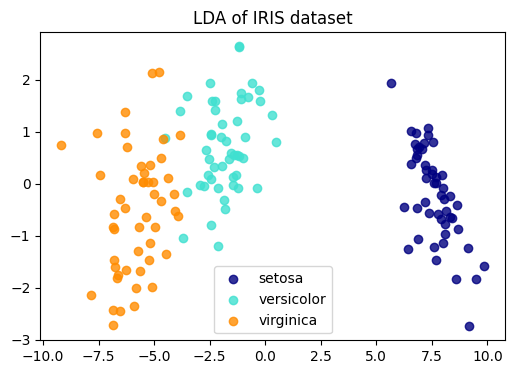

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize LDA and fit the model
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Plot the results
plt.figure(figsize=(6, 4))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.8, color=color,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


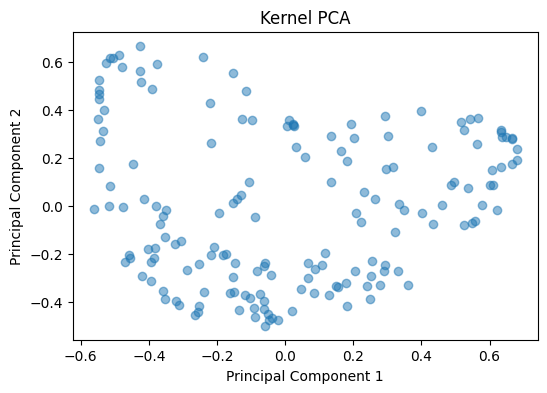

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

# Step 2: Specify the file path
file_path = '/content/Country-data.csv'

# Step 3: Read the CSV file
data = pd.read_csv(file_path)

# Step 4: Extract X and y values
# Assuming 'child_mort' is the target column
target_column = 'child_mort'  # replace with actual target column name if different

# Split the dataset into features (X) and target (y)
X = data.drop(target_column, axis=1)
y = data[target_column]

# Step 5: Preprocess the data
# Exclude non-numeric columns before scaling
X_numeric = X.select_dtypes(include=np.number)

# Standardize the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Step 6: Perform Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf')  # You can choose other kernels like 'poly' or 'sigmoid'
X_kpca = kpca.fit_transform(X_scaled)

# Step 7: Visualize the results
plt.figure(figsize=(6, 4))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], alpha=0.5)
plt.title('Kernel PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


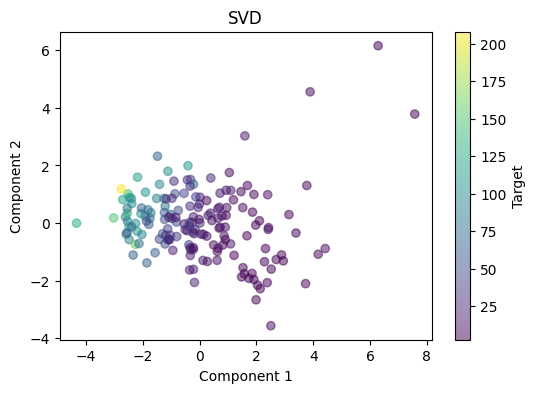

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
# Step 2: Specify the file path
file_path = '/content/Country-data.csv'
# Step 3: Read the CSV file
data = pd.read_csv(file_path)
# Step 4: Extract X and y values
# Assuming 'child_mort' is the target column
target_column = 'child_mort'  # replace with actual target column name if different
# Split the dataset into features (X) and target (y)
X = data.drop(target_column, axis=1)
y = data[target_column]
# Step 5: Preprocess the data
# Exclude non-numeric columns before scaling
X_numeric = X.select_dtypes(include=np.number)

# Standardize the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)
# Step 6: Perform Truncated SVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_scaled)
# Step 7: Visualize the results with different plotting
plt.figure(figsize=(6, 4))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('SVD')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Target')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Train Loss: 0.8805466169001537
Test Loss: 0.806349681213212


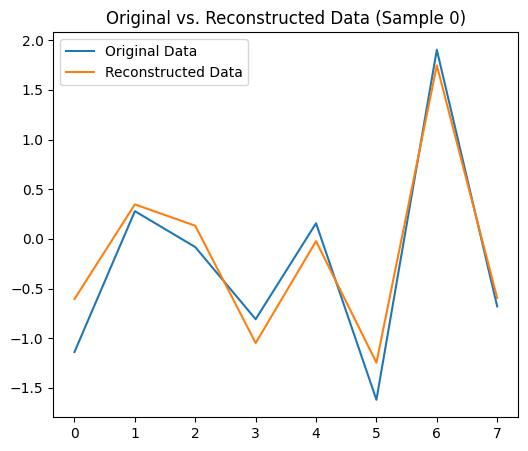

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# Step 2: Specify the file path
file_path = '/content/Country-data.csv'

# Step 3: Read the CSV file
data = pd.read_csv(file_path)

# Step 4: Preprocess the data
# Assuming 'child_mort' is the target column
target_column = 'child_mort'  # replace with actual target column name if different

# Separate features (X) and target (y)
X = data.drop(target_column, axis=1)
y = data[target_column]

# Exclude non-numeric columns before scaling
X_numeric = X.select_dtypes(include=np.number)

# Standardize the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Define and train the autoencoder
autoencoder = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=1000, random_state=42)
autoencoder.fit(X_train, X_train)

# Step 6: Evaluate the autoencoder
train_loss = autoencoder.score(X_train, X_train)
test_loss = autoencoder.score(X_test, X_test)
print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

# Step 7: Visualize reconstructed data
encoded_data = autoencoder.predict(X_scaled)

# Plot original vs. reconstructed data for a sample
sample_index = 0  # Change this index to visualize other samples
plt.figure(figsize=(6, 5))
plt.plot(X_scaled[sample_index], label='Original Data')
plt.plot(encoded_data[sample_index], label='Reconstructed Data')
plt.title('Original vs. Reconstructed Data (Sample {})'.format(sample_index))
plt.legend()
plt.show()